<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/LA_in_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🟦 Linear Least Squares


## Problem

![](https://fmin.xyz/docs/applications/lls_idea.svg)
In a least-squares, or linear regression, problem, we have measurements $ X \in \mathbb{R}^{m \times n} $ and $ y \in \mathbb{R}^{m} $ and seek a vector $ \theta \in \mathbb{R}^{n} $ such that $ X \theta $ is close to $ y $. Closeness is defined as the sum of the squared differences: 

$$ 
\sum\limits_{i=1}^m (x_i^\top \theta - y_i)^2
$$

also known as the $ l_2 $-norm squared, $ \|X \theta - y\|^2_2 $

For example, we might have a dataset of $m$ users, each represented by $n$ features. Each row $x_i^\top$ of $X$ is the features for user $ i $, while the corresponding entry $y_i$ of $y$ is the measurement we want to predict from $x_i^\top$, such as ad spending. The prediction is given by $ x_i^\top \theta $.

We find the optimal $\theta$ by solving the optimization problem

$$
\|X \theta - y\|^2_2 \to \min_{\theta \in \mathbb{R}^{n}}
$$

Let $\theta^*$ denote the optimal $ \theta $. The quantity $ r=X \theta^* - y $ is known as the residual. If $ \|r\|_2 = 0 $, we have a perfect fit.

Note, that the function needn't be linear in the argument $x$ but only in the parameters $\theta$ that are to be determined in the best fit.
![](https://fmin.xyz/docs/applications/non_linear_fit.svg)

## Approaches

### Moore–Penrose inverse
If the matrix $X$ is relatively small, we can write down and calculate exact solution:

$$
\theta^* = (X^\top X)^{-1} X^\top y = X^\dagger y, 
$$

where $X^\dagger$ is called [pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) matrix. However, this approach squares the condition number of the problem, which could be an obstacle in case of ill-conditioned huge scale problem. 

### QR decomposition
For any matrix $X \in \mathbb{R}^{m \times n}$ there is exists QR decomposition:

$$
X = Q \cdot R,
$$

where  $Q$ is an orthogonal matrix (its columns are orthogonal unit vectors meaning  $Q^\top Q=QQ^\top=I$ and $R$ is an upper triangular matrix. It is important to notice, that since $Q^{-1} = Q^\top$, we have:

$$
QR\theta = y \quad \longrightarrow \quad R \theta = Q^\top y
$$

Now, process of finding theta consists of two steps:
1. Find the QR decomposition of $X$.
1. Solve triangular system $R \theta = Q^\top y$, which is triangular and, therefore, easy to solve.

### Cholesky decomposition
For any positive definite matrix $A \in \mathbb{R}^{n \times n}$ there is exists Cholesky decomposition:

$$
X^\top X = A = L^\top \cdot L,
$$

where  $L$ is an lower triangular matrix. We have:

$$
L^\top L\theta = y \quad \longrightarrow \quad L^\top z_\theta = y
$

Now, process of finding theta consists of two steps:
1. Find the Cholesky decomposition of $X^\top X$.
1. Find the $z_\theta = L\theta$ by solving triangular system $L^\top z_\theta = y$
1. Find the $\theta$ by solving triangular system $L\theta = z_\theta$

Note, that in this case the error stil proportional to the squared condition number.

![](https://fmin.xyz/docs/applications/lls_times.svg)

# 🤴 Principal Component Analysis (PCA)

## Intuition
Imagine, that you have a dataset of points. Your goal is to choose orthogonal axes, that describe your data the most informative way. To be precise, we choose first axis in such a way, that maximize the variance (expressiveness) of the projected data. All the following axes have to be orthogonal to the previously chosen ones, while satisfy largest possible variance of the projections. 

Let's take a look at the simple 2d data. We have a set of blue points on the plane. We can easily see that the projections on the first axis (red dots) have maximum variance at the final position of the animation. The second (and the last) axis should  be orthogonal to the previous one.
![](https://i.stack.imgur.com/lNHqt.gif)
[source](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

This idea could be used in a variety ways. For example, it might happen, that projection of complex data on the principal plane (only 2 components) bring you enough intuition for clustering. The picture below plots projection of the labeled dataset onto the first to principal components (PC's), we can clearly see, that only two vectors (these PC's) would be enogh to differ Finnish people from Italian in particular dataset (celiac disease (Dubois et al. 2010))
![](https://nla.skoltech.ru/files/pca_example.png)
[source](https://privefl.github.io/bigsnpr/articles/how-to-PCA.html)

## Problem
The first component should be defined in order to maximize variance. Suppose, we've already normalized the data, i.e. $\sum\limits_i a_i = 0$, then sample variance will become the sum of all squared projections of data points to our vector ${\mathbf  {w}}_{{(1)}}$, which implies the following optimization problem:
$$
{\mathbf  {w}}_{{(1)}}={\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {a}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}
$$

or

$$
 \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Aw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} \right\}
$$

since we are looking for the unit vector, we can reformulate the problem:

$$
{\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} }{\mathbf {w} ^{\top}\mathbf {w} }}\right\}}
$$

It is [known](https://en.wikipedia.org/wiki/Rayleigh_quotient), that for positive semidefinite matrix $A^\top A$ such vector is nothing else, but eigenvector of $A^\top A$, which corresponds to the largest eigenvalue. The following components will give you the same results (eigenvectors).

So, we can conclude, that the following mapping:

$$
\underset{n \times k}{\Pi} = \underset{n \times d}{A} \cdot \underset{d \times k}{W} 
$$

describes the projection of data onto the $k$ principal components, where $W$ contains first (by the size of eigenvalues) $k$ eigenvectors of $A^\top A$.

Now we'll briefly derive how SVD decomposition could lead us to the PCA.

Firstly, we write down SVD decomposition of our matrix:

$$
A = U \Sigma W^\top
$$

and to its transpose:

$$
\begin{align}
A^\top
&= (U \Sigma W^\top)^\top \\
&= (W^\top)^\top \Sigma^\top U^\top \\
&= W \Sigma^\top U^\top \\
&= W \Sigma U^\top
\end{align}
$$



Then, consider matrix $A A^\top$:

$$
\begin{align}
A^\top A
&= (W \Sigma U^\top)(U \Sigma V^\top)  \\
&= W \Sigma I \Sigma W^\top \\
&= W \Sigma \Sigma W^\top \\
&= W \Sigma^2 W^\top
\end{align}
$$

Which corresponds to the eigendecomposition of matrix $A^\top A$, where $W$ stands for the matrix of eigenvectors of $A^\top A$, while $\Sigma^2$ contains eigenvalues of $A^\top A$.

At the end:
$$
\begin{align}
\Pi &= A \cdot W =\\
 &= U \Sigma W^\top W = U \Sigma
\end{align}
$$

The latter formula provide us with easy way to compute PCA via SVD with any number of principal components:
$$
\Pi_r = U_r \Sigma_r
$$

### Example. 🌼Iris dataset
Consider the classical Iris dataset
![](https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png)
[source](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

We have the dataset matrix $A \in \mathbb{R}^{150 \times 4}$

In [113]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris        = load_iris()
A           = iris['data']
labels      = iris['target']
classes     = iris['target_names']
label_names = np.array([classes[label] for label in labels])
colours     = ['red', 'blue', 'green']
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

🤖: Dataset contains 150 points in 4-dimensional space


In [114]:
# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,wh = np.linalg.svd(A_std)

[]

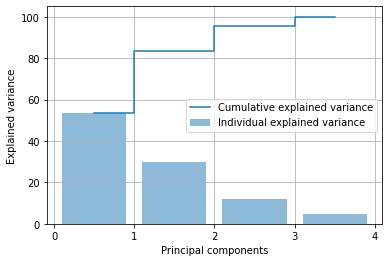

In [115]:
total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

xs = [0.5 + i for i in range(4)]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks([0,1,2,3,4])
plt.grid()
plt.plot()

In [116]:
rank = 2
w = wh.T
projections = u[:,:rank] @ np.diag(s[:rank])

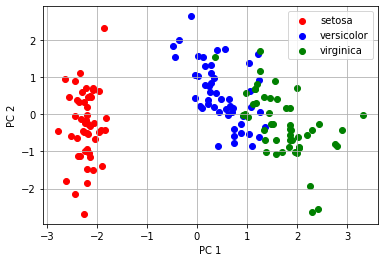

In [117]:
for label, colour in zip(classes, colours):
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label,
                c = colour)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.grid()
plt.show()

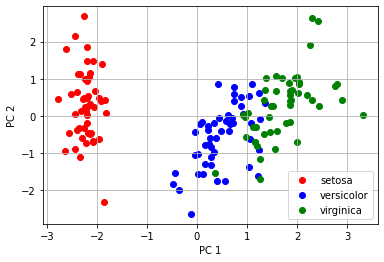

In [118]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
projections_sklearn = sklearn_pca.fit_transform(A_std)

for label, colour in zip(classes, colours):
    plt.scatter(projections_sklearn[label_names == label, 0],
                projections_sklearn[label_names == label, 1],
                label = label,
                c = colour)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.grid()
plt.show()

### Example. 🍷 Wine dataset

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine #lol
from sklearn.preprocessing import StandardScaler

wine        = load_wine()
A           = wine['data']
labels      = wine['target']
classes     = wine['target_names']
label_names = np.array([classes[label] for label in labels])
colours     = ['red', 'blue', 'green']
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,wh = np.linalg.svd(A_std)

total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

🤖: Dataset contains 178 points in 13-dimensional space


[]

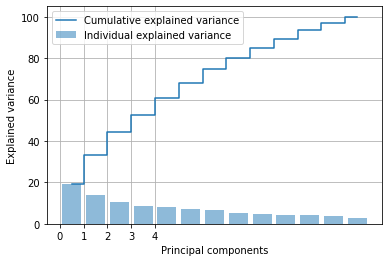

In [120]:
xs = [0.5 + i for i in range(13)]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks([0,1,2,3,4])
plt.grid()
plt.plot()

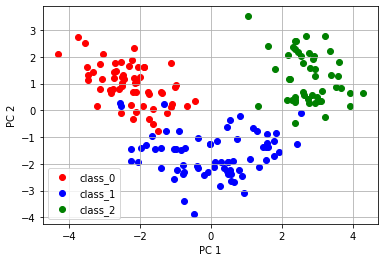

In [121]:
rank = 2
projections = u[:,:rank] @ np.diag(s[:rank])

for label, colour in zip(classes, colours):
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label,
                c = colour)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.grid()
plt.show()

### Related materials
* [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

# 📽 Recommender systems

## What data do we have?

- Matrix user-item
- Elements of the matrix are ratings
- A lot of missing data

## How can we use SVD?

- Original paper [*Performance of recommender algorithms on top-n recommendation tasks*](https://dl.acm.org/citation.cfm?id=1864721), Cremonesi, P., Koren, Y., and Turrin, R
- Construct embeddings of users and items in some subspace of $\mathbb{R}^n$
- For known users preferences we can find the most relevant items in this subspace
- How can we compute it?

## Movielens dataset with ratings of movies

In [148]:
# Download data
import urllib.request
urllib.request.urlretrieve(f'https://github.com/MerkulovDaniil/optim/blob/master/assets/files/movies.gz?raw=true', 'movies.gz')
urllib.request.urlretrieve(f'https://github.com/MerkulovDaniil/optim/blob/master/assets/files/ratings.gz?raw=true', 'ratings.gz')

import pandas as pd
movies = pd.read_csv('movies.gz', index_col='movieid', header=0, encoding='unicode-escape')[['movienm', 'genreid']]
ratings = pd.read_csv('ratings.gz', header=0, encoding='ISO-8859-1')

## Example of entry

In [164]:
movies.head()

,movienm,genreid
movieid,,
1,Toy Story (1995),"Animation, Children's, Comedy"
2,Jumanji (1995),"Adventure, Children's, Fantasy"
3,Grumpier Old Men (1995),"Comedy, Romance"
4,Waiting to Exhale (1995),"Comedy, Drama"
5,Father of the Bride Part II (1995),Comedy


In [162]:
ratings.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


### Set the list of preferences

In [151]:
best_movies = "matrix|die hard"
target_movies = movies.loc[movies.movienm.str.contains(best_movies, flags=2)]
target_movies

,movienm,genreid
movieid,,
165,Die Hard: With a Vengeance (1995),"Action, Thriller"
1036,Die Hard (1988),"Action, Thriller"
1370,Die Hard 2 (1990),"Action, Thriller"
2571,"Matrix, The (1999)","Action, Sci-Fi, Thriller"


### Find the indices of the favourite films

In [152]:
favorite_movies_ids = target_movies.index
print(favorite_movies_ids)

Int64Index([165, 1036, 1370, 2571], dtype='int64', name='movieid')


### Create matrix with ratings

In [153]:
import scipy
data_matrix = scipy.sparse.csr_matrix((ratings.rating.values.astype('f8'), 
                               (ratings.userid.values, ratings.movieid.values)))
print(data_matrix.shape)

(6041, 3953)


### Compute SVD

In [157]:
rank = 30
_, S, Vt = scipy.sparse.linalg.svds(data_matrix, k=rank, return_singular_vectors='vh')

### Check decreasing of the singular values

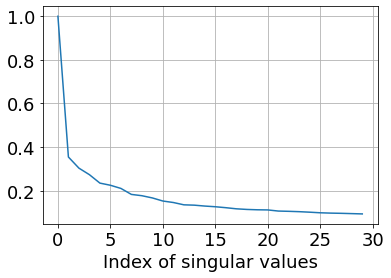

In [158]:
plt.plot(S[::-1] / S[-1])
plt.xlabel("Index of singular values", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid(True)

### Compute correlations

In [159]:
print(Vt[:, favorite_movies_ids].shape)
correlation = Vt.T @ Vt[:, favorite_movies_ids]
print(correlation.shape)
score = correlation.sum(axis=1)
print(score.shape)
# movies.loc[np.argsort(-Vt.T @ Vt[:, favorite_movies_ids].sum(axis=1))[:15]] # assuming binary preference vector

(30, 4)
(3953, 4)
(3953,)


### Compute resulting recommendations

In [165]:
top_n = 10
print(np.sort(score)[::-1][:top_n])
movies.loc[np.argsort(-score)[:top_n]]

[0.15287975 0.15033298 0.14251449 0.12089341 0.11414237 0.10847293
 0.10257672 0.09429381 0.09029753 0.0862588 ]


,movienm,genreid
movieid,,
457,"Fugitive, The (1993)","Action, Thriller"
2571,"Matrix, The (1999)","Action, Sci-Fi, Thriller"
589,Terminator 2: Judgment Day (1991),"Action, Sci-Fi, Thriller"
1610,"Hunt for Red October, The (1990)","Action, Thriller"
1036,Die Hard (1988),"Action, Thriller"
1240,"Terminator, The (1984)","Action, Sci-Fi, Thriller"
377,Speed (1994),"Action, Romance, Thriller"
2916,Total Recall (1990),"Action, Adventure, Sci-Fi, Thriller"
1370,Die Hard 2 (1990),"Action, Thriller"


## Generalizations 

- If we try to use context in our model, we have to introduce a new Gram matrix for scalar product. We have **hybrid model**, more details see in [this paper](https://arxiv.org/pdf/1802.06398.pdf)
- [Blog about recommender systems with technical details](https://www.eigentheories.com/archive.html#)

# 🍸 Cocktail party problem

![](https://infinitymesh.com/media/1171/cocktailpartyrecordingspeech.png?width=287&height=278)

Problem setup: A number of people are talking simultaneously and we want to separate each persons speech so we can listen to it separately. Now the caveat with this type of approach is that we need as many mixtures as we have source signals or in terms of the cocktail party problem we need as many microphones as people talking in the room.

First, some technical stuff for loading audio

In [111]:
# Download data
import urllib.request
N_signals = 3
for i in range(N_signals):
    urllib.request.urlretrieve(f'https://github.com/MerkulovDaniil/optim/blob/master/assets/files/starcraft{i+1}.wav?raw=true', f'track{i+1}.wav')
    # urllib.request.urlretrieve(f'https://github.com/MerkulovDaniil/optim/blob/master/assets/files/meme{i+1}.wav?raw=true', f'track{i+1}.wav')

Sample rate: 22050 Hz
Total time: 4.310929705215419 s


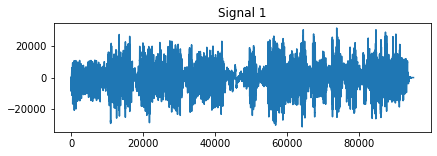

Sample rate: 22050 Hz
Total time: 1.7182766439909296 s


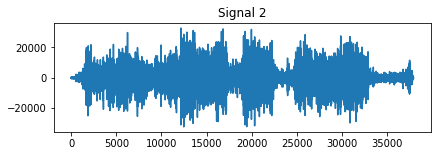

Sample rate: 22050 Hz
Total time: 1.6950566893424037 s


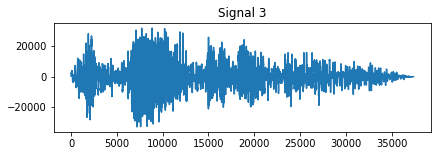

In [112]:
# Needed imports
import numpy as np
from IPython.display import Audio, display
from scipy.io import wavfile
from matplotlib import pyplot as plt

signals = []
N_signals = 3
for i in range(N_signals):
    # Load the file on an object
    data = wavfile.read(f'track{i+1}.wav')

    # Separete the object elements
    framerate   = data[0]
    signal      = data[1]
    signals.append(signal)
    time        = np.arange(0,len(signal))/framerate

    # Show information about the object
    print('Sample rate:',framerate,'Hz')
    print('Total time:',len(signal)/framerate,'s')

    # plot
    plt.figure(figsize=(6.75,2))
    plt.plot(signal)
    plt.title(f'Signal {i+1}')
    plt.show()

    # Generate a player for mono sound
    display(Audio(signal,rate=framerate))

The signals are mixed by creating a mixing matrix $A$ and taking the dot product of $A$ with the signals $S$.

Afterwards I plot the mixed signals and create the wavPlayers, so you can listen! The code below uses scikit-learn package, which can be installed (if it is not installed)

```
conda install scikit-learn
```

(Anaconda Python distribution assumed)

Mixing Matrix:
[[0.27 0.96 0.25]
 [0.33 0.03 0.62]
 [0.4  0.01 0.13]]
Sample rate: 22050 Hz
Total time: 4.310929705215419 s


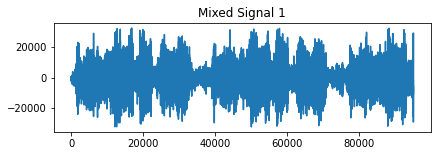

Sample rate: 22050 Hz
Total time: 4.310929705215419 s


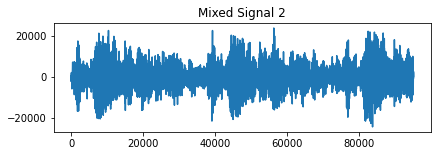

Sample rate: 22050 Hz
Total time: 4.310929705215419 s


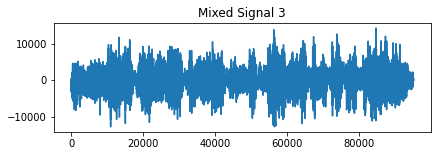

In [107]:
import numpy as np

# Adjust for different clip lengths

length          = max([len(signal) for signal in signals])
unilen_signals  = [np.resize(signal, (length,1)) for signal in signals]

S = (np.hstack(unilen_signals)).T

# Mixing Matrix
A = np.random.uniform(size=(3,3))
A = A / A.sum(axis=0)
# A = np.array([[1, 0.5, 0.5],
#               [0.5, 1, 0.5], 
#               [0.5, 0.5, 1]]) 
print('Mixing Matrix:')
print(A.round(2))

# Mix Signals
X = A @ S
#Some noise as well
X = X * (1 + 1e-2 * np.random.randn(X.shape[0], X.shape[1]))
# Mixed Signal i
for i in range(X.shape[0]):
    mix_signal = (X[i]).astype(np.int16)
    # Show information about the object
    print('Sample rate:',framerate,'Hz')
    print('Total time:',len(mix_signal)/framerate,'s')

    # plot
    plt.figure(figsize=(6.75,2))
    plt.plot(mix_signal)
    plt.title(f'Mixed Signal {i+1}')
    plt.show()

    # Generate a player for mono sound
    display(Audio(mix_signal,rate=framerate))

Now we have to separate the mixtures. For this we use the FastICA method from the sklearn module. The idea is to find a matrix $W$ that unmixes the mixture$$X=WY,$$such that $X$ are as independent, as possible. There are different criteria of independence. Independent of two random variables requires infinite number of equations to be solved, and there are many variants for doing this, and this is still an active research topic.

In [108]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X.T).T  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

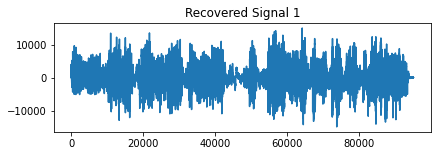

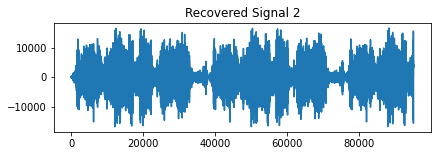

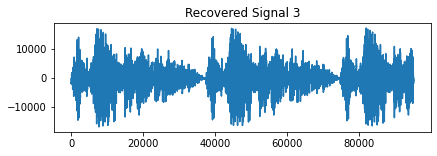

In [110]:
# Show separation results

# Separated Signal i
gain = 1000000
for i in range(S_.shape[0]):
    recovered_signal = (gain*S_[i]).astype(np.int16)
    # plot
    plt.figure(figsize=(6.75,2))
    plt.plot(recovered_signal)
    plt.title(f'Recovered Signal {i+1}')
    plt.show()

    # Generate a player for mono sound
    display(Audio(recovered_signal,rate=framerate))